In [ ]:
import os
from typing import List, Tuple, Dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
STATE_LABELS = {
    "PostureDatastoreController_FDTask_torque": "RL+QP (FDTask)",
    "PostureDatastoreController_FDTask_torque_extForce": "FDTask_extForce",
    "PostureDatastoreController_PureRL": "RL",
    "PostureDatastoreController_TorqueTask_torque": "RL+QP (TorqueTask)",
    "PostureDatastoreController_TorqueTask_torque_extForce": "TorqueTask_extForce",
}

STATE_COLORS = {
    "PostureDatastoreController_FDTask_torque": "deepskyblue",
    "PostureDatastoreController_FDTask_torque_extForce": "royalblue",
    "PostureDatastoreController_PureRL": "darkgrey",
    "PostureDatastoreController_TorqueTask_torque": "coral",
    "PostureDatastoreController_TorqueTask_torque_extForce": "darkred",
}

In [ ]:
df_FDTask = pd.read_csv("twoPointExp_FDTask.csv", sep=';')
df_TorqueTask = pd.read_csv("twoPointExp_TorqueTask.csv", sep=';')
df_RL = pd.read_csv("twoPointExp_RL.csv", sep=';')

In [ ]:
def icra_style():
    """Apply a compact ICRA-like style for paper figures."""
    rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica', 'DejaVu Sans', 'Arial'],
        'pdf.fonttype': 42,  # ensure editable text in vector pdfs
        'ps.fonttype': 42,
        'font.size': 8,
        'axes.titlesize': 9,
        'axes.labelsize': 8,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        'axes.linewidth': 0.6,
    })

In [ ]:
torque_limit_up = np.array([95, 95, 95, 95, 45, 45, 45])
torque_limit_low = -torque_limit_up
qdot_limit_up = np.array([2.0944, 2.0944, 2.0944, 2.0944, 3.049, 3.049, 3.049])
qdot_limit_low = -qdot_limit_up
q_limit_up = np.array([100., 2.15, 100., 2.45, 100., 2.0, 100.])
q_limit_low = -q_limit_up

In [ ]:
torque_column_names = [f"tauIn_{i}" for i in range(7)]
q_column_names = [f"qIn_{i}" for i in range(7)]
qdot_column_names = [f"alphaIn_{i}" for i in range(7)]

In [ ]:
# Convert time to iteration by counting the number of rows in each dataframe
num_iterations_RL = df_RL.shape[0]
num_iterations_FDTask = df_FDTask.shape[0]
num_iterations_TorqueTask = df_TorqueTask.shape[0]
print(f"Number of iterations: RL = {num_iterations_RL}, FDTask = {num_iterations_FDTask}, TorqueTask = {num_iterations_TorqueTask}")

min_iterations = min(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations: {min_iterations}")
min_iterations_Task = min(num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Min iterations (Tasks only): {min_iterations_Task}")
max_iterations = max(num_iterations_RL, num_iterations_FDTask, num_iterations_TorqueTask)
print(f"Max iterations: {max_iterations}")

freq = 1000.0
print(f"Frequency: {freq} Hz")
dt = 1.0 / freq
print(f"Time step: {dt} s")

min_time = (min_iterations - 1) * dt
print(f"Min time: {min_time} s")
min_time_Task = (min_iterations_Task - 1) * dt
print(f"Min time (Tasks only): {min_time_Task} s")
max_time = (max_iterations - 1) * dt
print(f"Max time: {max_time} s")



Number of iterations: RL = 110080, FDTask = 100030, TorqueTask = 100020
Min iterations: 100020
Min iterations (Tasks only): 100020
Max iterations: 110080
Frequency: 1000.0 Hz
Time step: 0.001 s
Min time: 100.019 s
Min time (Tasks only): 100.019 s
Max time: 110.07900000000001 s


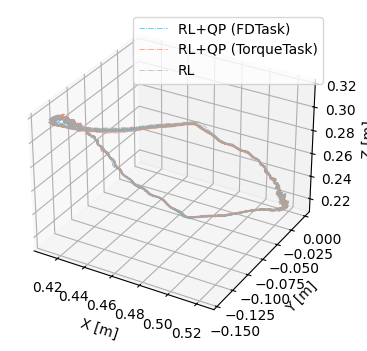

In [ ]:
# Plot 3D of 'RLController_endEffectorTarget_pos_x', 'RLController_endEffectorTarget_pos_y', 'RLController_endEffectorTarget_pos_z' for RL, FDTask, and TorqueTask

# For each dataframe, starting from the first row where the column RLController_convergedToPtInit == 1, plot the 3D trajectory of the end-effector target position until the end of the dataframe
plt.figure(figsize=(4.2, 3.5))
ax = plt.axes(projection='3d')
start_idx_RL = df_RL.index[df_RL['RLController_convergedToPtInit'] == 1][0]
start_idx_FDTask = df_FDTask.index[df_FDTask['RLController_convergedToPtInit'] == 1][0]
start_idx_TorqueTask = df_TorqueTask.index[df_TorqueTask['RLController_convergedToPtInit'] == 1][0]
ax.plot(df_FDTask.loc[start_idx_FDTask:, 'RLController_endEffectorTarget_pos_x'], 
        df_FDTask.loc[start_idx_FDTask:, 'RLController_endEffectorTarget_pos_y'], 
        df_FDTask.loc[start_idx_FDTask:, 'RLController_endEffectorTarget_pos_z'], 
        label=STATE_LABELS["PostureDatastoreController_FDTask_torque"], color=STATE_COLORS["PostureDatastoreController_FDTask_torque"], linewidth=0.6, linestyle="-.", alpha=0.8)
ax.plot(df_TorqueTask.loc[start_idx_TorqueTask:, 'RLController_endEffectorTarget_pos_x'], 
        df_TorqueTask.loc[start_idx_TorqueTask:, 'RLController_endEffectorTarget_pos_y'], 
        df_TorqueTask.loc[start_idx_TorqueTask:, 'RLController_endEffectorTarget_pos_z'], 
        label=STATE_LABELS["PostureDatastoreController_TorqueTask_torque"], color=STATE_COLORS["PostureDatastoreController_TorqueTask_torque"], linewidth=0.6, linestyle="-.", alpha=0.8)
ax.plot(df_RL.loc[start_idx_RL:, 'RLController_endEffectorTarget_pos_x'], 
        df_RL.loc[start_idx_RL:, 'RLController_endEffectorTarget_pos_y'], 
        df_RL.loc[start_idx_RL:, 'RLController_endEffectorTarget_pos_z'], 
        label=STATE_LABELS["PostureDatastoreController_PureRL"], color=STATE_COLORS["PostureDatastoreController_PureRL"], linewidth=0.6, linestyle="-.", alpha=0.8)
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
# ax.set_title('End-Effector Target Position Trajectory')
ax.legend()
plt.tight_layout()
plt.savefig("end_effector_trajectory.pdf", dpi=300)
plt.show()